In [2]:
import os
import random
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, save_img

# === PATHS ===
non_demented_dir = r'C:\Users\sandy\Downloads\binary_balanced_augmenteddd\Non Demented'
target_count = 18000

# === Current Image Count ===
current_images = [img for img in os.listdir(non_demented_dir) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
current_count = len(current_images)
print(f"Current image count: {current_count}")

# === Calculate how many to generate ===
images_to_generate = target_count - current_count
print(f"Images to generate: {images_to_generate}")

# === Define ImageDataGenerator for Augmentation ===
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.10,
    height_shift_range=0.10,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

# === Start Augmentation ===
generated = 0
while generated < images_to_generate:
    # Randomly pick an image from existing ones
    img_name = random.choice(current_images)
    img_path = os.path.join(non_demented_dir, img_name)
    img = load_img(img_path)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)  # Shape (1, height, width, channels)

    # Generate one image
    for batch in datagen.flow(x, batch_size=1):
        new_filename = f"augmented_{generated}_{img_name}"
        save_path = os.path.join(non_demented_dir, new_filename)
        save_img(save_path, batch[0])
        generated += 1
        if generated >= images_to_generate:
            break

print(f"✅ Augmentation complete! Total images in Non-Demented: {target_count}")


Current image count: 14976
Images to generate: 3024
✅ Augmentation complete! Total images in Non-Demented: 18000


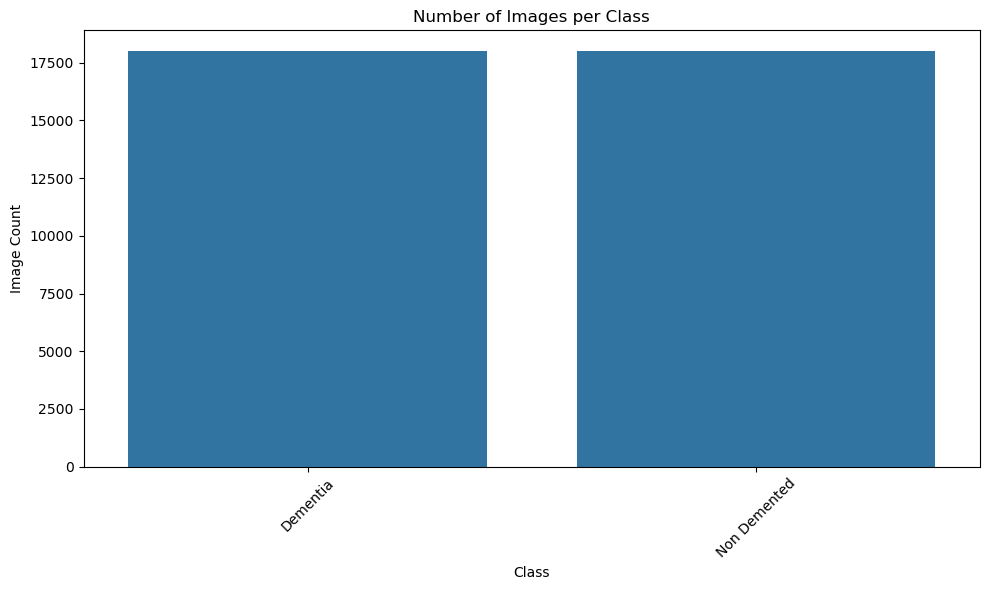

In [3]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
from collections import Counter

DATASET_DIR = r"C:\Users\sandy\Downloads\binary_balanced_augmenteddd"
def get_class_distribution(dataset_path):
    classes = os.listdir(dataset_path)
    class_counts = {}
    for cls in classes:
        class_dir = os.path.join(dataset_path, cls)
        if os.path.isdir(class_dir):
            class_counts[cls] = len(os.listdir(class_dir))
    return class_counts

class_distribution = get_class_distribution(DATASET_DIR)

# Plot it
plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()))
plt.xticks(rotation=45)
plt.title("Number of Images per Class")
plt.xlabel("Class")
plt.ylabel("Image Count")
plt.tight_layout()
plt.show()


Found 36000 files belonging to 2 classes.
Using 28800 files for training.
Found 36000 files belonging to 2 classes.
Using 7200 files for validation.
Training Custom CNN model...
Epoch 1/15


C:\Users\sandy\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 739ms/step - accuracy: 0.6495 - loss: 0.5883 - precision: 0.6791 - recall: 0.5332
Epoch 1: val_loss improved from inf to 0.23630, saving model to C:\Users\sandy\Downloads\modelly.h5


200/200 ━━━━━━━━━━━━━━━━━━━━ 162s 797ms/step - accuracy: 0.6501 - loss: 0.5876 - precision: 0.6798 - recall: 0.5340 - val_accuracy: 0.9119 - val_loss: 0.2363 - val_precision: 0.9399 - val_recall: 0.8727 - learning_rate: 0.0010
Epoch 2/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 740ms/step - accuracy: 0.8877 - loss: 0.2730 - precision: 0.9199 - recall: 0.8544
Epoch 2: val_loss did not improve from 0.23630
200/200 ━━━━━━━━━━━━━━━━━━━━ 159s 796ms/step - accuracy: 0.8878 - loss: 0.2729 - precision: 0.9200 - recall: 0.8545 - val_accuracy: 0.8831 - val_loss: 0.2765 - val_precision: 0.8426 - val_recall: 0.9295 - learning_rate: 0.0010
Epoch 3/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 784ms/step - accuracy: 0.8982 - loss: 0.2462 - precision: 0.9251 - recall: 0.8699
Epoch 3: val_loss improved from 0.23630 to 0.17956, saving model to C:\Users\sandy\Downloads\modelly.h5


200/200 ━━━━━━━━━━━━━━━━━━━━ 169s 844ms/step - accuracy: 0.8982 - loss: 0.2462 - precision: 0.9252 - recall: 0.8699 - val_accuracy: 0.9331 - val_loss: 0.1796 - val_precision: 0.9647 - val_recall: 0.8930 - learning_rate: 0.0010
Epoch 4/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 766ms/step - accuracy: 0.9297 - loss: 0.1984 - precision: 0.9539 - recall: 0.9037
Epoch 4: val_loss did not improve from 0.17956
200/200 ━━━━━━━━━━━━━━━━━━━━ 165s 826ms/step - accuracy: 0.9297 - loss: 0.1984 - precision: 0.9539 - recall: 0.9037 - val_accuracy: 0.9344 - val_loss: 0.1870 - val_precision: 0.9882 - val_recall: 0.8735 - learning_rate: 0.0010
Epoch 5/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 756ms/step - accuracy: 0.9270 - loss: 0.1932 - precision: 0.9550 - recall: 0.8943
Epoch 5: val_loss did not improve from 0.17956
200/200 ━━━━━━━━━━━━━━━━━━━━ 163s 817ms/step - accuracy: 0.9270 - loss: 0.1932 - precision: 0.9550 - recall: 0.8943 - val_accuracy: 0.9125 - val_loss: 0.2310 - val_precision: 1.0000 - val_recall: 0.8189

200/200 ━━━━━━━━━━━━━━━━━━━━ 166s 828ms/step - accuracy: 0.9284 - loss: 0.1741 - precision: 0.9508 - recall: 0.9029 - val_accuracy: 0.9369 - val_loss: 0.1738 - val_precision: 0.9828 - val_recall: 0.8850 - learning_rate: 0.0010
Epoch 7/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 739ms/step - accuracy: 0.9412 - loss: 0.1496 - precision: 0.9636 - recall: 0.9139
Epoch 7: val_loss improved from 0.17379 to 0.14494, saving model to C:\Users\sandy\Downloads\modelly.h5


200/200 ━━━━━━━━━━━━━━━━━━━━ 160s 798ms/step - accuracy: 0.9412 - loss: 0.1496 - precision: 0.9636 - recall: 0.9139 - val_accuracy: 0.9475 - val_loss: 0.1449 - val_precision: 0.9444 - val_recall: 0.9469 - learning_rate: 0.0010
Epoch 8/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 765ms/step - accuracy: 0.9497 - loss: 0.1401 - precision: 0.9687 - recall: 0.9311
Epoch 8: val_loss improved from 0.14494 to 0.12229, saving model to C:\Users\sandy\Downloads\modelly.h5


200/200 ━━━━━━━━━━━━━━━━━━━━ 165s 827ms/step - accuracy: 0.9497 - loss: 0.1401 - precision: 0.9687 - recall: 0.9311 - val_accuracy: 0.9531 - val_loss: 0.1223 - val_precision: 0.9563 - val_recall: 0.9450 - learning_rate: 0.0010
Epoch 9/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 738ms/step - accuracy: 0.9541 - loss: 0.1184 - precision: 0.9707 - recall: 0.9370
Epoch 9: val_loss did not improve from 0.12229
200/200 ━━━━━━━━━━━━━━━━━━━━ 159s 796ms/step - accuracy: 0.9541 - loss: 0.1184 - precision: 0.9707 - recall: 0.9370 - val_accuracy: 0.9456 - val_loss: 0.1523 - val_precision: 1.0000 - val_recall: 0.8869 - learning_rate: 0.0010
Epoch 10/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 739ms/step - accuracy: 0.9646 - loss: 0.0999 - precision: 0.9790 - recall: 0.9489
Epoch 10: val_loss improved from 0.12229 to 0.09263, saving model to C:\Users\sandy\Downloads\modelly.h5


200/200 ━━━━━━━━━━━━━━━━━━━━ 159s 795ms/step - accuracy: 0.9646 - loss: 0.0999 - precision: 0.9790 - recall: 0.9489 - val_accuracy: 0.9650 - val_loss: 0.0926 - val_precision: 0.9810 - val_recall: 0.9451 - learning_rate: 0.0010
Epoch 11/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 736ms/step - accuracy: 0.9667 - loss: 0.0964 - precision: 0.9830 - recall: 0.9492
Epoch 11: val_loss did not improve from 0.09263
200/200 ━━━━━━━━━━━━━━━━━━━━ 159s 794ms/step - accuracy: 0.9667 - loss: 0.0964 - precision: 0.9830 - recall: 0.9492 - val_accuracy: 0.9638 - val_loss: 0.0982 - val_precision: 0.9747 - val_recall: 0.9495 - learning_rate: 0.0010
Epoch 12/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 735ms/step - accuracy: 0.9641 - loss: 0.1031 - precision: 0.9743 - recall: 0.9537
Epoch 12: val_loss did not improve from 0.09263
200/200 ━━━━━━━━━━━━━━━━━━━━ 158s 791ms/step - accuracy: 0.9641 - loss: 0.1030 - precision: 0.9743 - recall: 0.9537 - val_accuracy: 0.9588 - val_loss: 0.1073 - val_precision: 0.9452 - val_recall: 0.

200/200 ━━━━━━━━━━━━━━━━━━━━ 163s 814ms/step - accuracy: 0.9649 - loss: 0.0951 - precision: 0.9730 - recall: 0.9574 - val_accuracy: 0.9744 - val_loss: 0.0758 - val_precision: 0.9786 - val_recall: 0.9669 - learning_rate: 0.0010
Epoch 14/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 749ms/step - accuracy: 0.9719 - loss: 0.0811 - precision: 0.9801 - recall: 0.9627
Epoch 14: val_loss did not improve from 0.07583
200/200 ━━━━━━━━━━━━━━━━━━━━ 161s 808ms/step - accuracy: 0.9720 - loss: 0.0811 - precision: 0.9801 - recall: 0.9627 - val_accuracy: 0.9656 - val_loss: 0.0826 - val_precision: 0.9488 - val_recall: 0.9802 - learning_rate: 0.0010
Epoch 15/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 755ms/step - accuracy: 0.9779 - loss: 0.0590 - precision: 0.9814 - recall: 0.9749
Epoch 15: val_loss did not improve from 0.07583
200/200 ━━━━━━━━━━━━━━━━━━━━ 163s 814ms/step - accuracy: 0.9779 - loss: 0.0590 - precision: 0.9814 - recall: 0.9749 - val_accuracy: 0.9675 - val_loss: 0.0779 - val_precision: 0.9589 - val_recall: 0.

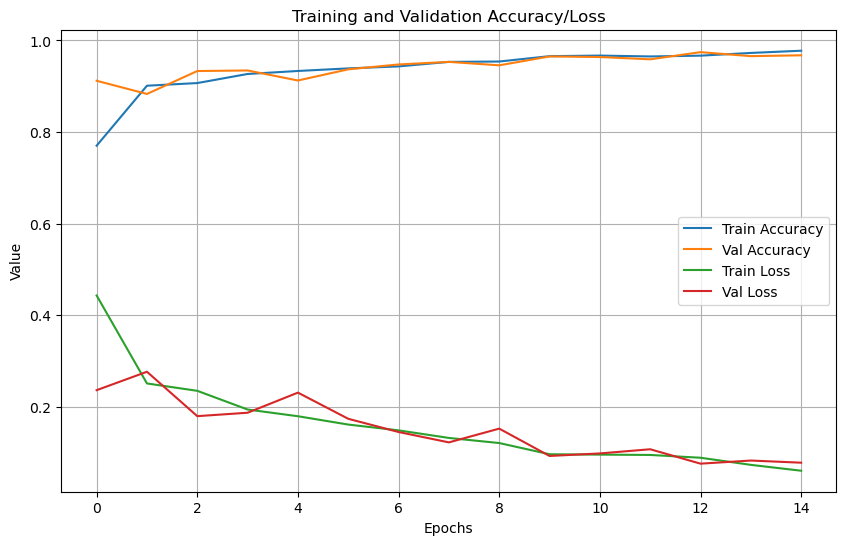

Found 36000 files belonging to 2 classes.
Using 7200 files for validation.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

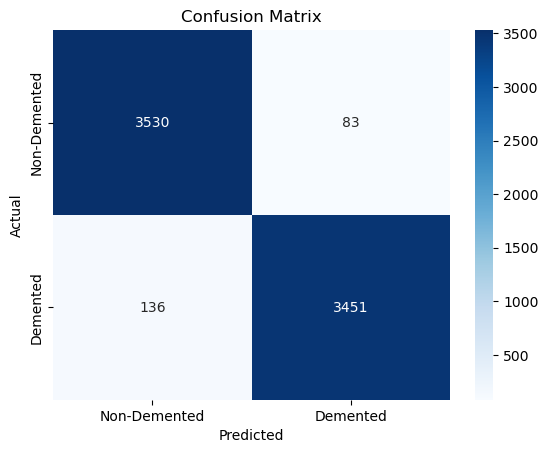

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# === CONFIG ===
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42
BASE_DIR = r"C:\Users\sandy\Downloads\binary_balanced_augmenteddd"
MODEL_PATH = r"C:\Users\sandy\Downloads\modelly.h5"

# === Load Datasets ===
train_dataset = tf.keras.utils.image_dataset_from_directory(
    BASE_DIR,
    label_mode='binary',
    validation_split=0.2,
    subset='training',
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    BASE_DIR,
    label_mode='binary',
    validation_split=0.2,
    subset='validation',
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

# === Repeat datasets for multiple steps per epoch ===
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.repeat().prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.repeat().prefetch(buffer_size=AUTOTUNE)

# === Build Custom CNN Model ===
def build_custom_cnn_model():
    model = models.Sequential([
        layers.Rescaling(1./255, input_shape=IMAGE_SIZE + (3,)),
        layers.Conv2D(32, 3, activation='relu'), layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation='relu'), layers.MaxPooling2D(),
        layers.Conv2D(128, 3, activation='relu'), layers.MaxPooling2D(),
        layers.Conv2D(256, 3, activation='relu'), layers.MaxPooling2D(),
        layers.Conv2D(512, 3, activation='relu'), layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(256, activation='relu'), layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]
    )
    return model

# === Callbacks ===
checkpoint_cb = callbacks.ModelCheckpoint(
    MODEL_PATH, monitor='val_loss', save_best_only=True, mode='min', verbose=1)

earlystop_cb = callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

reduce_lr_cb = callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)

# === Load or Train ===
if os.path.exists(MODEL_PATH):
    print("Loading model from file...")
    binary_model = load_model(MODEL_PATH)
    history = None
else:
    print("Training Custom CNN model...")
    binary_model = build_custom_cnn_model()
    history = binary_model.fit(
        train_dataset,
        validation_data=val_dataset,
        steps_per_epoch=200,
        validation_steps=50,
        epochs=15,
        callbacks=[checkpoint_cb, earlystop_cb, reduce_lr_cb]
    )

# === Plot Training History ===
def plot_history(history):
    if history is None:
        return
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(10, 6))
    plt.plot(acc, label='Train Accuracy')
    plt.plot(val_acc, label='Val Accuracy')
    plt.plot(loss, label='Train Loss')
    plt.plot(val_loss, label='Val Loss')
    plt.title('Training and Validation Accuracy/Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history(history)

# === Evaluation on Validation Set ===
# Recreate the validation dataset (no repeat, no shuffle) for prediction
val_dataset_eval = tf.keras.utils.image_dataset_from_directory(
    BASE_DIR,
    label_mode='binary',
    validation_split=0.2,
    subset='validation',
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

y_true, y_pred = [], []
for x_batch, y_batch in val_dataset_eval:
    preds = (binary_model.predict(x_batch) > 0.5).astype(int).flatten()
    y_pred.extend(preds)
    y_true.extend(y_batch.numpy().astype(int).flatten())

# === Classification Report & Confusion Matrix ===
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Non-Demented', 'Demented']))

sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Demented', 'Demented'],
            yticklabels=['Non-Demented', 'Demented'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


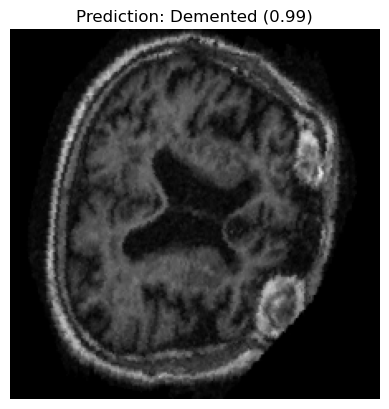

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# === Constants ===
MODEL_PATH =  r"C:\Users\sandy\Downloads\modelly.h5"
IMAGE_PATH = r"C:\Users\sandy\Downloads\correct_predictions\Non-Demented\img_16.png" # <- Replace with your test image path
IMAGE_SIZE = (224, 224)

# === Load the trained model ===
model = tf.keras.models.load_model(MODEL_PATH)

# === Load and preprocess image ===
img = image.load_img(IMAGE_PATH, target_size=IMAGE_SIZE)
img_array = image.img_to_array(img)  # Convert to NumPy array
img_array = img_array / 255.0        # Normalize to [0,1] (same as Rescaling layer)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension


# === Predict ===
prediction = model.predict(img_array)[0][0]
label = "Demented" if prediction >= 0.5 else "Non-Demented"

# === Show Result ===
plt.imshow(img)
plt.title(f"Prediction: {label} ({prediction:.2f})")
plt.axis('off')
plt.show()


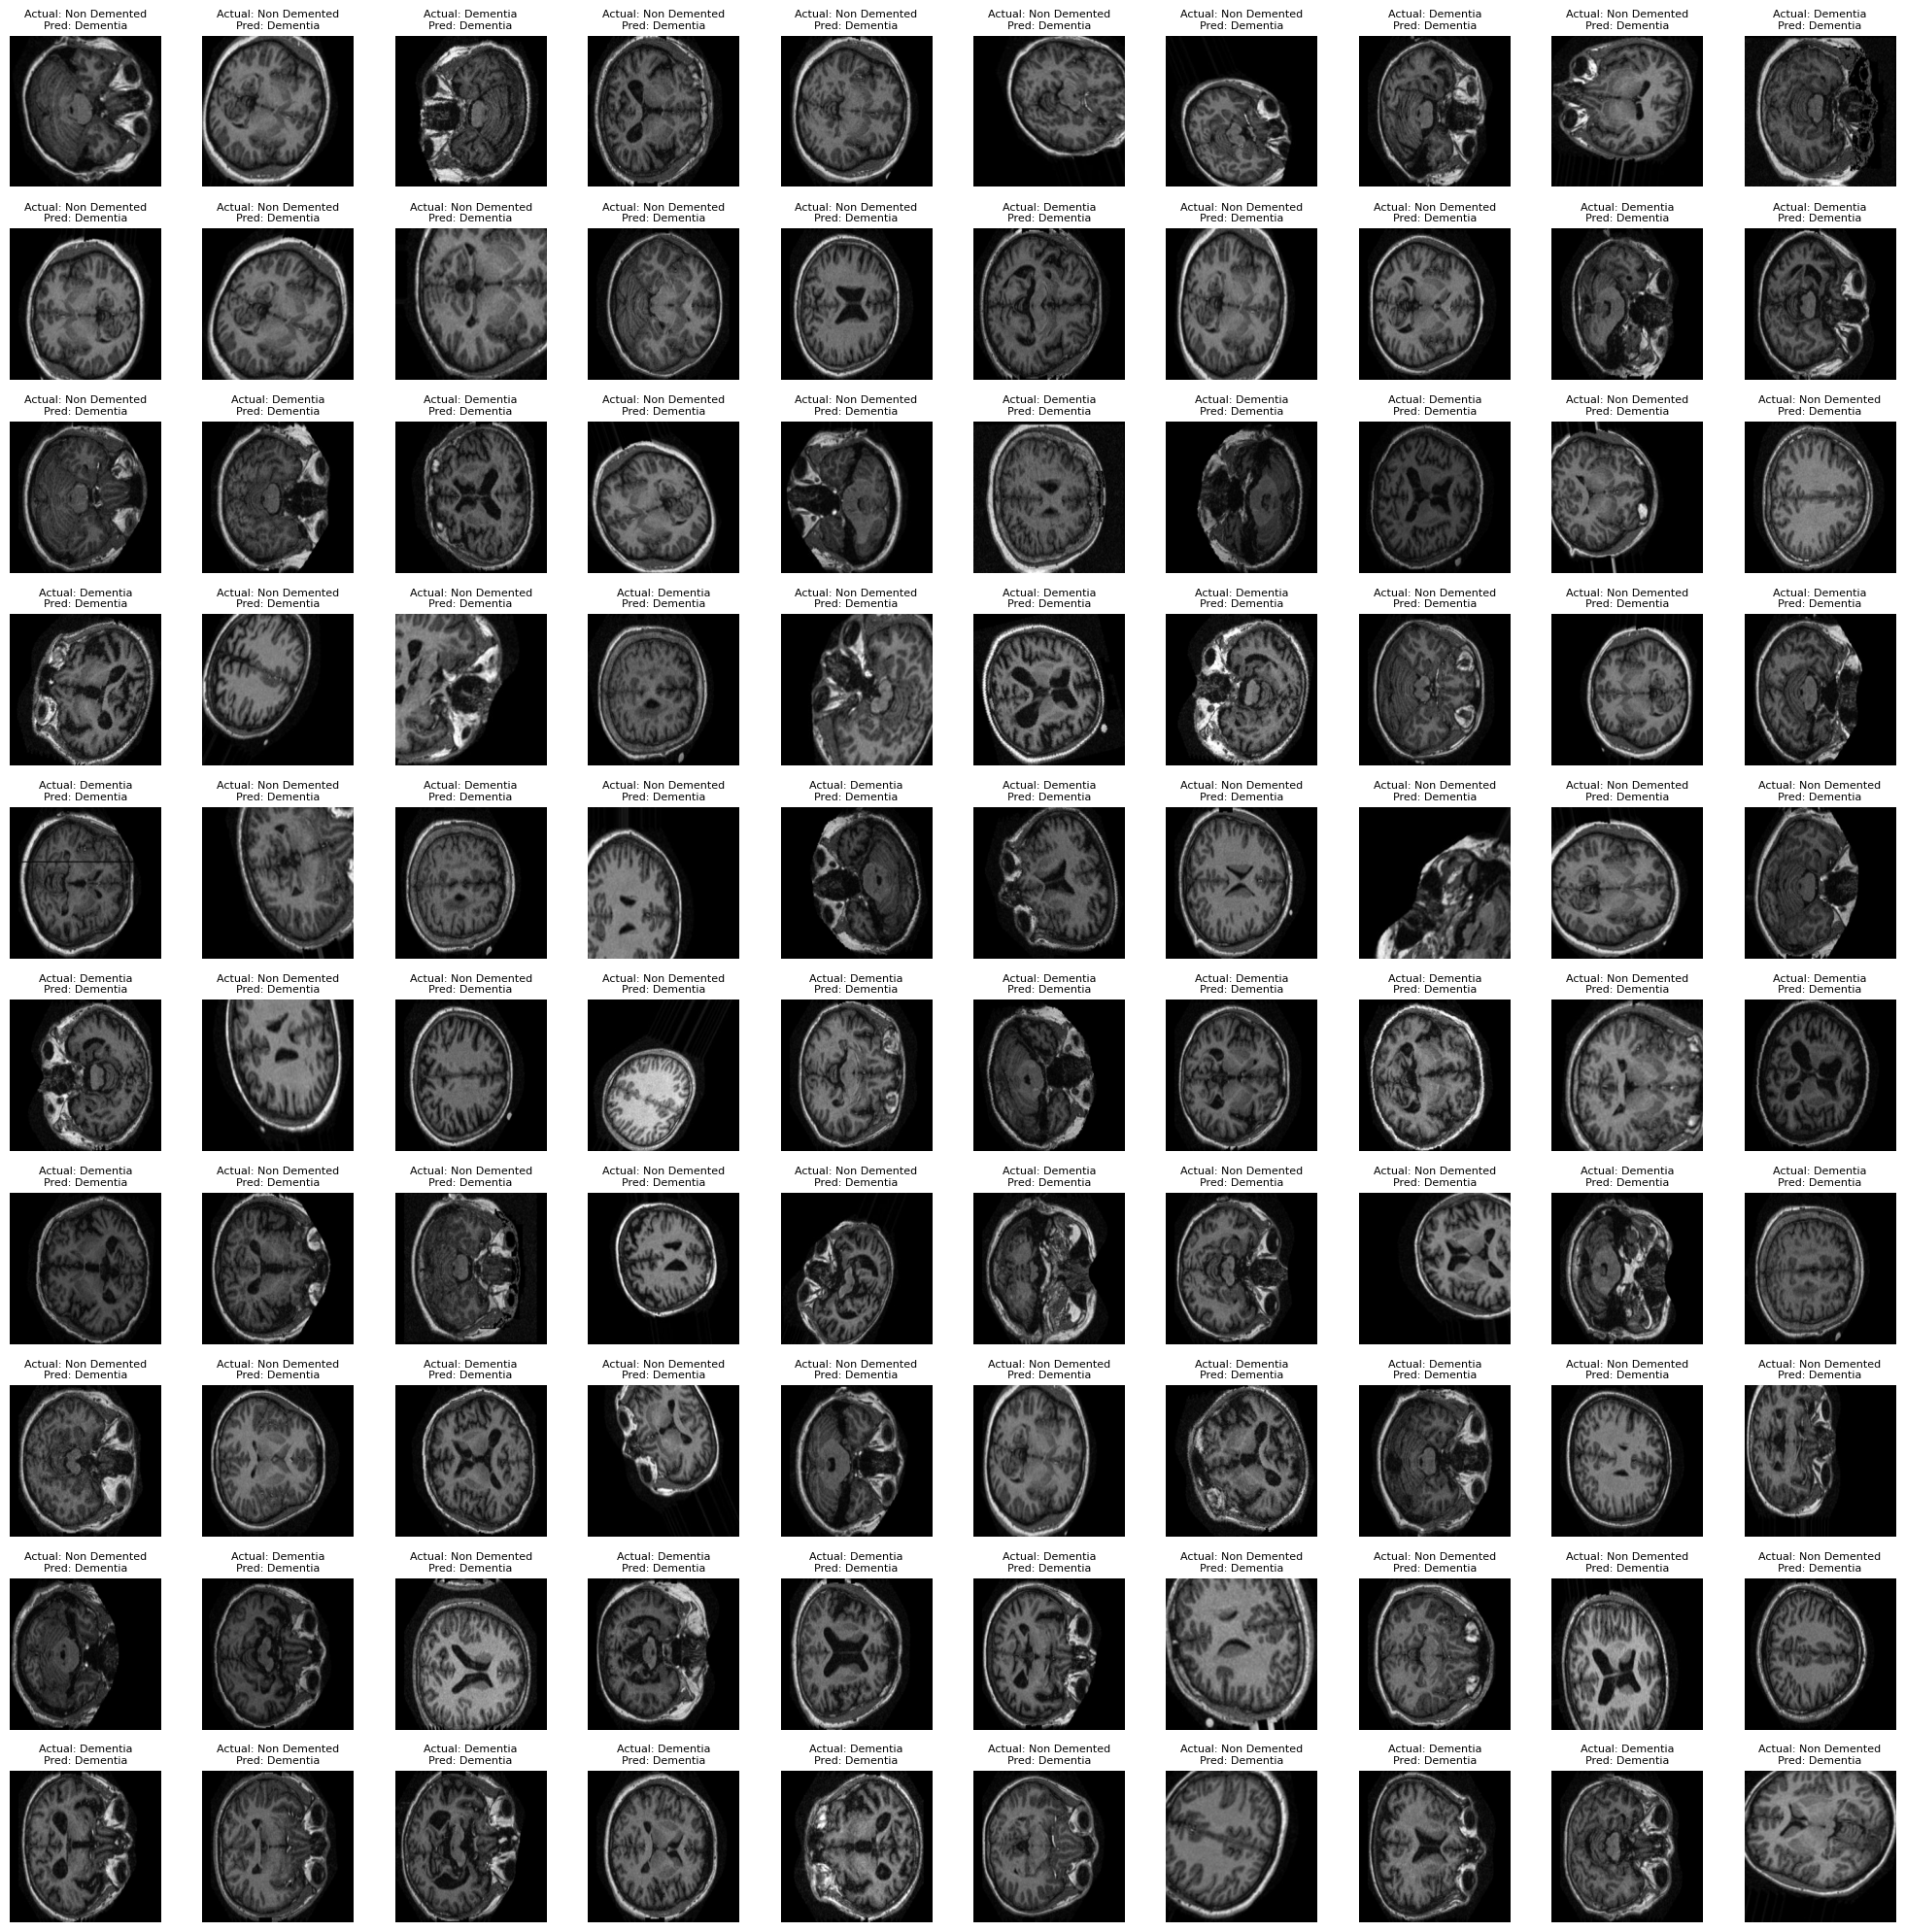

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image

# === CONFIG ===
IMAGE_SIZE = (224, 224)
MODEL_PATH =r"C:\Users\sandy\Downloads\modelly.h5"
BASE_DIR = r"C:\Users\sandy\Downloads\binary_balanced_augmenteddd"
CLASS_NAMES = ['Non Demented', 'Dementia']
NUM_SAMPLES = 100

# === Load Model ===
model = load_model(MODEL_PATH)

# === Get 100 Random Image Paths ===
all_images = []
for class_name in CLASS_NAMES:
    class_dir = os.path.join(BASE_DIR, class_name)
    image_files = [os.path.join(class_dir, f) for f in os.listdir(class_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    all_images.extend(image_files)

random.seed(42)
selected_images = random.sample(all_images, NUM_SAMPLES)

# === Predict and Plot ===
plt.figure(figsize=(20, 20))
for idx, img_path in enumerate(selected_images):
    # Load and preprocess image
    img = Image.open(img_path).convert("RGB").resize(IMAGE_SIZE)
    img_array = np.array(img) / 255.0
    img_tensor = np.expand_dims(img_array, axis=0)

    # Predict
    pred = model.predict(img_tensor, verbose=0)[0][0]
    predicted_label = CLASS_NAMES[1] if pred > 0.5 else CLASS_NAMES[0]

    # Actual label
    actual_label = os.path.basename(os.path.dirname(img_path))

    # Plot
    plt.subplot(10, 10, idx + 1)
    plt.imshow(img)
    plt.title(f"Actual: {actual_label}\nPred: {predicted_label}", fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()



Class-wise Evaluation Metrics:

              precision    recall  f1-score      support
Non-Demented   0.962902  0.977027  0.969913  3613.000000
Demented       0.976514  0.962085  0.969246  3587.000000
accuracy       0.969583  0.969583  0.969583     0.969583
macro avg      0.969708  0.969556  0.969580  7200.000000
weighted avg   0.969684  0.969583  0.969581  7200.000000


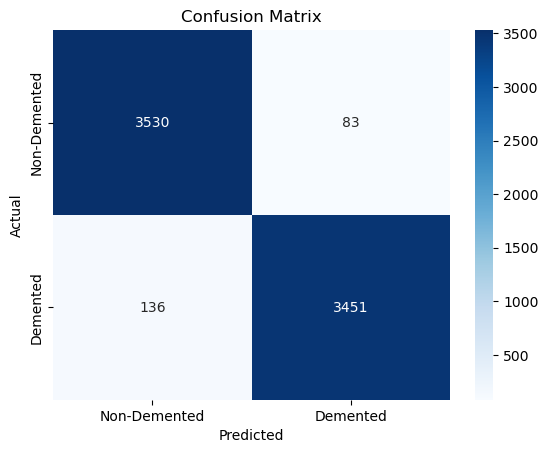

In [4]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# === Classification Report & Confusion Matrix ===
target_names = ['Non-Demented', 'Demented']
report_dict = classification_report(y_true, y_pred, target_names=target_names, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

print("\nClass-wise Evaluation Metrics:\n")
print(report_df[['precision', 'recall', 'f1-score', 'support']])

# === Confusion Matrix ===
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [5]:
# === Show correctly predicted images for each class ===
class_names = ['Non-Demented', 'Demented']

correct_images = {0: [], 1: []}  # 0: Non-Demented, 1: Demented
max_images_per_class = 3  # Number of correct samples to display per class

for images, labels in binary_val_dataset.unbatch():
    img_array = tf.expand_dims(images, axis=0)  # Add batch dimension
    prediction = binary_model.predict(img_array)
    predicted_class = int(prediction > 0.5)
    true_class = int(labels.numpy())

    if predicted_class == true_class and len(correct_images[true_class]) < max_images_per_class:
        correct_images[true_class].append((images, predicted_class))

    if all(len(correct_images[i]) >= max_images_per_class for i in (0, 1)):
        break  # Got enough samples

# Plotting
plt.figure(figsize=(10, 6))
for idx, cls in enumerate([0, 1]):  # 0: Non-Demented, 1: Demented
    for i, (img, pred) in enumerate(correct_images[cls]):
        plt.subplot(2, max_images_per_class, idx * max_images_per_class + i + 1)
        plt.imshow(img.numpy().astype("uint8"))
        plt.title(f"{class_names[cls]} ✓")
        plt.axis('off')

plt.suptitle("Correctly Predicted Images (✓)", fontsize=16)
plt.tight_layout()
plt.show()


NameError: name 'binary_val_dataset' is not defined

Found 36000 files belonging to 2 classes.
Using 7200 files for validation.


C:\Users\sandy\AppData\Local\Temp\ipykernel_9276\2859420422.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = int(prediction > 0.5)
C:\Users\sandy\AppData\Local\Temp\ipykernel_9276\2859420422.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_class = int(label.numpy())


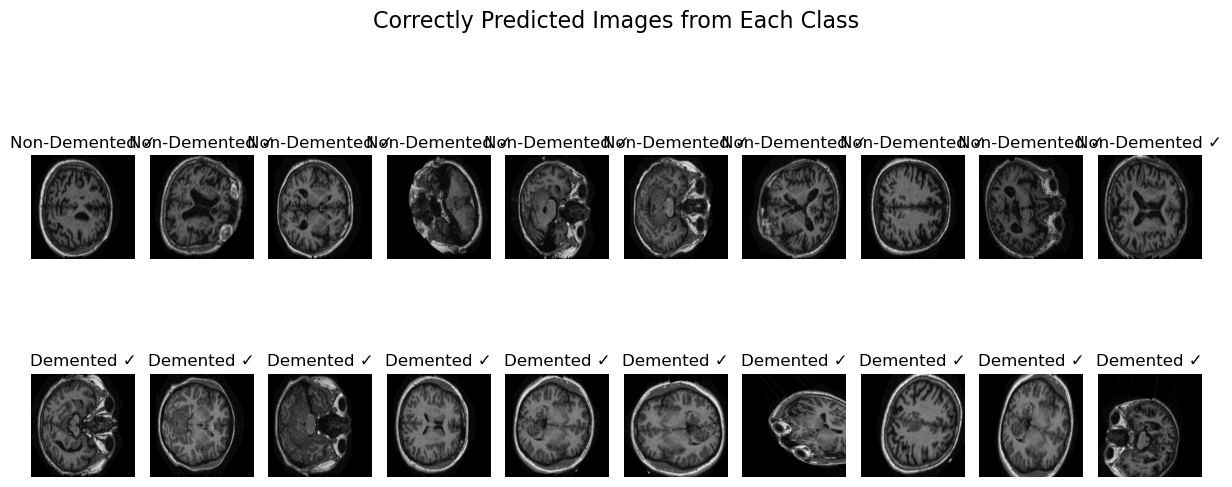

In [9]:
binary_val_dataset = tf.keras.utils.image_dataset_from_directory(
    BASE_DIR,
    label_mode='binary',
    validation_split=0.2,
    subset='validation',
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

# Optional: prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
binary_val_dataset = binary_val_dataset.prefetch(buffer_size=AUTOTUNE)


import matplotlib.pyplot as plt
import tensorflow as tf

# === Show correctly predicted images for each class ===
class_names = ['Non-Demented', 'Demented']
correct_images = {0: [], 1: []}  # 0: Non-Demented, 1: Demented
max_images_per_class = 10  # Number of correct samples to display per class

# Loop over unbatched validation data
for image, label in binary_val_dataset.unbatch():
    img_array = tf.expand_dims(image, axis=0)  # Add batch dimension
    prediction = binary_model.predict(img_array, verbose=0)
    predicted_class = int(prediction > 0.5)
    true_class = int(label.numpy())

    if predicted_class == true_class and len(correct_images[true_class]) < max_images_per_class:
        correct_images[true_class].append((image, predicted_class))

    # Break if we have enough samples for both classes
    if all(len(correct_images[i]) >= max_images_per_class for i in (0, 1)):
        break

# === Plotting Correctly Predicted Images ===
plt.figure(figsize=(12, 6))
for cls in [0, 1]:
    for i, (img, pred) in enumerate(correct_images[cls]):
        plt.subplot(2, max_images_per_class, cls * max_images_per_class + i + 1)
        plt.imshow(img.numpy().astype("uint8"))
        plt.title(f"{class_names[cls]} ✓")
        plt.axis('off')

plt.suptitle("Correctly Predicted Images from Each Class", fontsize=16)
plt.tight_layout()
plt.show()


In [10]:
pred = (model.predict(img_array) > 0.5).astype(int)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


In [12]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r"C:\Users\sandy\Downloads\binary_balanced_augmenteddd\Non Demented\augmented_100_OAS1_0167_MR1_mpr-1_124.png"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # rescaling
img_array = np.expand_dims(img_array, axis=0)

prediction = binary_model.predict(img_array)
print("Prediction score:", prediction)

predicted_class = int(prediction > 0.5)
class_names = ['Non-Demented', 'Demented']
print("Predicted class:", class_names[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Prediction score: [[0.9937599]]
Predicted class: Demented


C:\Users\sandy\AppData\Local\Temp\ipykernel_9276\4158759680.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = int(prediction > 0.5)


In [13]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r"C:\Users\sandy\Downloads\binary_balanced_augmenteddd\Non Demented\augmented_100_OAS1_0167_MR1_mpr-1_124.png"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = binary_model.predict(img_array)
print("Prediction probability:", prediction[0][0])

predicted_class = int(prediction[0][0] > 0.5)
class_names = ['Non-Demented', 'Demented']
print("Predicted class:", class_names[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Prediction probability: 0.9937599
Predicted class: Demented


In [14]:
print("Raw prediction probability:", prediction[0][0])


Raw prediction probability: 0.9937599


C:\Users\sandy\AppData\Local\Temp\ipykernel_9276\290708760.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = int(prediction > 0.5)
C:\Users\sandy\AppData\Local\Temp\ipykernel_9276\290708760.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_class = int(label.numpy())


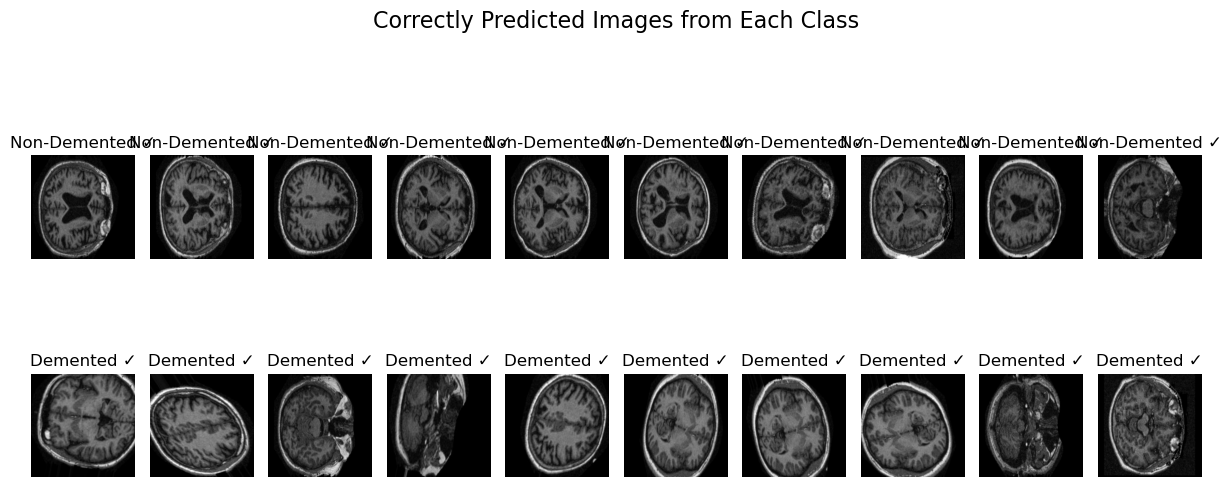

In [20]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from PIL import Image

# === Directory for saving images ===
SAVE_DIR = r"C:\Users\sandy\Downloads\correct_predictions"
class_names = ['Non-Demented', 'Demented']
correct_images = {0: [], 1: []}
max_images_per_class = 10

# Create folders
for cls in class_names:
    os.makedirs(os.path.join(SAVE_DIR, cls), exist_ok=True)

# === Process validation dataset ===
for idx, (image, label) in enumerate(binary_val_dataset.unbatch()):
    img_array = tf.expand_dims(image, axis=0)
    prediction = binary_model.predict(img_array, verbose=0)
    predicted_class = int(prediction > 0.5)
    true_class = int(label.numpy())

    if predicted_class == true_class and len(correct_images[true_class]) < max_images_per_class:
        # Save image
        pil_img = Image.fromarray(image.numpy().astype("uint8"))
        save_path = os.path.join(SAVE_DIR, class_names[true_class], f"img_{idx}.png")
        pil_img.save(save_path)

        # Store for optional display
        correct_images[true_class].append((image, predicted_class))

    if all(len(correct_images[i]) >= max_images_per_class for i in (0, 1)):
        break

# === Plotting (optional) ===
plt.figure(figsize=(12, 6))
for cls in [0, 1]:
    for i, (img, pred) in enumerate(correct_images[cls]):
        plt.subplot(2, max_images_per_class, cls * max_images_per_class + i + 1)
        plt.imshow(img.numpy().astype("uint8"))
        plt.title(f"{class_names[cls]} ✓")
        plt.axis('off')

plt.suptitle("Correctly Predicted Images from Each Class", fontsize=16)
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


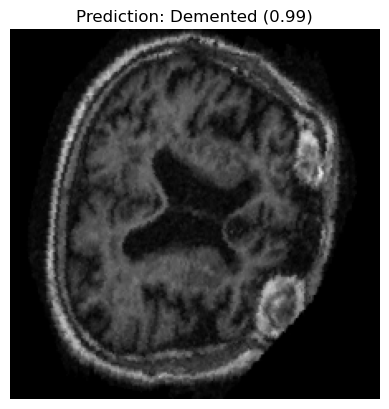

In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# === Load Model ===
MODEL_PATH = r"C:\Users\sandy\Downloads\modelly.h5"
binary_model = tf.keras.models.load_model(MODEL_PATH)

# === Define Image and Class Info ===
IMAGE_SIZE = (224, 224)
class_names = ['Non-Demented', 'Demented']

# === Load and Preprocess Image ===
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize to [0,1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array, img  # Return both for plotting

# === Predict on New Image ===
SAMPLE_IMAGE_PATH = r"C:\Users\sandy\Downloads\correct_predictions\Non-Demented\img_16.png" # Change to your test image path

img_array, display_img = load_and_preprocess_image(SAMPLE_IMAGE_PATH)
prediction = binary_model.predict(img_array)[0][0]
predicted_class = int(prediction > 0.5)

# === Display Prediction ===
plt.imshow(display_img)
plt.title(f"Prediction: {class_names[predicted_class]} ({prediction:.2f})")
plt.axis('off')
plt.show()


In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# === Constants ===
MODEL_PATH = r"C:\Users\sandy\Downloads\modelly.h5"
IMAGE_PATH = r"C:\Users\sandy\Downloads\correct_predictions\Non-Demented\img_15.png"  # ← Change this to your test image path
IMAGE_SIZE = (256, 256)  # Use the same size as during training
CLASS_NAMES = ['Non-Demented', 'Demented']

# === Load the trained model ===
model = tf.keras.models.load_model(MODEL_PATH)

# === Function to preprocess and predict ===
def predict_single_image(image_path):
    # Load and preprocess the image
    img = Image.open(image_path).convert('RGB')
    img = img.resize(IMAGE_SIZE)
    img_array = np.array(img) / 255.0  # Normalize to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict
    prediction = model.predict(img_array, verbose=0)
    predicted_class = int(prediction[0][0] > 0.5)
    predicted_label = CLASS_NAMES[predicted_class]

    # Display image with predicted label
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

    print(f"Predicted Class: {predicted_label}")
    print(f"Confidence Score: {prediction[0][0]:.4f}")

# === Run prediction ===
predict_single_image(IMAGE_PATH)


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 12800, but received input with shape (1, 18432)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 256, 256, 3), dtype=float32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>